<font color='red' size='6'>REMINDER</font>

# Fill in any place that says `YOUR CODE HERE`.
- You should remove the line that says `raise NotImplementedError()`. If you do not, your code will (unsurprisingly) throw a run-time error and cause everything to fail.
- Do **NOT** write your answer anywhere else other than where it says `YOUR CODE HERE`. Simply write your code directly below this comment in the **same code cell**.

# Make sure everything runs as expected.
- Go to the menubar, select *Kernel* > *Restart & Run All*

# Do <ins>NOT</ins> change the title (i.e., file name) of this notebook.

# Do <ins>NOT</ins> delete any of the cells in this notebook.

# Make sure you save your work
- Go to the menubar, select *File* > *Save and Checkpoint*

In [1]:
# Run this code cell before attempting to validate
from nose.tools import assert_equal, assert_in, assert_is_instance
from nose.tools import assert_almost_equal, assert_not_equal

-----

# Problem 1: Time Series Analysis

Be sure to complete these steps in the order outlined below and in their appropriate code cells. There is file named `META.csv` in the subfolder `data`. It contains the trading data for the company Meta.

1. Use `pandas` to read the file into a `DataFrame` named `meta`, being sure to use a `RangeIndex` and making sure any date columns come in as a true date object.
2. Convert the column names to have all lower case characters. Replace any spaces between words with the underscore character. These changes should be reflected in the existing `meta` `DataFrame`.
3. Change the index for `meta` to be the `date` column.
4. Create a line plot of the for the closing price.

In [2]:
# import pandas using the alias pd
import pandas as pd

# Use `pandas` to read the file into a `DataFrame` named `meta`, 
# being sure to use a `RangeIndex` and making sure any date 
# columns come in as a true date object.
# YOUR CODE HERE
meta = pd.read_csv('./data/META.csv', parse_dates=['Date'])

In [3]:
# confirm date is datetime64[ns] data type
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [4]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(type(meta.index), pd.core.indexes.range.RangeIndex, msg='You did not use a RangeIndex when reading in the data as instructed.')
import numpy as np
assert_equal(meta.Date.dtype, np.dtype('<M8[ns]'), msg='You did not set the `Date` column as a datetime[ns] data type')

In [5]:
# Convert the column names to have all lower case characters.
# Replace any spaces between words with the underscore character. 
# These changes should be reflected in the existing `meta` `DataFrame`.
# YOUR CODE HERE
meta.columns = meta.columns.str.lower()
meta.rename(columns={'adj close': 'adj_close'}, inplace=True)

In [6]:
# confirm all lowercase and spaces removed now
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       251 non-null    datetime64[ns]
 1   open       251 non-null    float64       
 2   high       251 non-null    float64       
 3   low        251 non-null    float64       
 4   close      251 non-null    float64       
 5   adj_close  251 non-null    float64       
 6   volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [7]:
# Change the index for `meta` to be the `date` column.
# YOUR CODE HERE
meta.set_index('date', inplace=True)

# check changes and confirm
meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       251 non-null    float64
 1   high       251 non-null    float64
 2   low        251 non-null    float64
 3   close      251 non-null    float64
 4   adj_close  251 non-null    float64
 5   volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<hr>

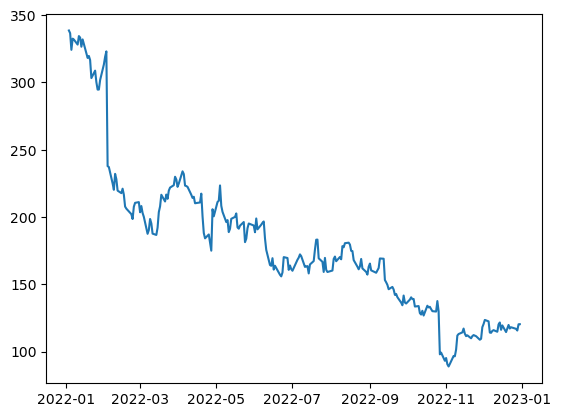

In [8]:
# Create a line plot of the for the closing price.
# YOUR CODE HERE

# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Line plot of the closing price for meta
fig, ax = plt.subplots()
ax.plot(meta.close)

-----

# Problem 2: Distribution Analysis

Be sure to complete these steps in the order outlined below and in their appropriate code cells. There is file named `customers.csv` in the subfolder `data`. It contains information on the customers of one of your clients.
1. Read the file into a `DataFrame` named `cust`.
2. Use `seaborn` to create a histogram (using all the defaults) for the amount spent.
3. Use `seaborn` to create a histogram for household income, split by marital status. Set the transparency to 0.25 and add a kernel density estimation line.
4. Use `seaborn` to create a boxplot for spending broken out by gender.

In [9]:
# Read the file into a `DataFrame` named `cust`.
# YOUR CODE HERE
cust = pd.read_csv('./data/customers.csv')

# view cust info
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8157 entries, 0 to 8156
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             8157 non-null   object
 1   join_date           8157 non-null   object
 2   gender              8157 non-null   object
 3   age                 8157 non-null   int64 
 4   marital_status      8157 non-null   object
 5   household_income    8157 non-null   int64 
 6   home_ownership      8157 non-null   object
 7   num_children        8157 non-null   int64 
 8   num_vehicles        8157 non-null   int64 
 9   last_purchase_date  8157 non-null   object
 10  spend               8157 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 701.1+ KB


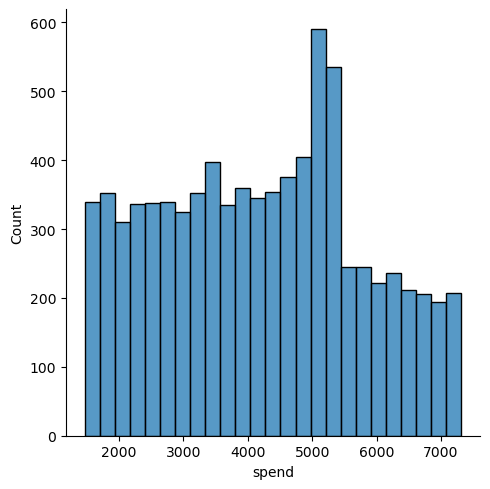

In [31]:
# Use `seaborn` to create a histogram for the amount spent.
# YOUR CODE HERE


# import seaborn package
import seaborn as sns
sns.displot(data=cust.spend, kind='hist')

### Carefully explain the important attributes of the histogram you created for spending in the Markdown cell below.

The largest frequency is just over $5,000 with the majority of the distribution appearing to be $5,000 or less spent. The x-axis depicts the amount of money spent. The y-axis depicts the count of customers. The distribution appears to be bimodal with the spending amounts being the two buckets greater than $5,000. Additionally, after the two peak buckets, the distribution drops significantly towards the higher levels of spending around $6,000-$7,000+. This may be an indicator that most customers in this data set do not spend more than around $5,000 while the majority appear to spend between approximately $1,000 and $4,750.  

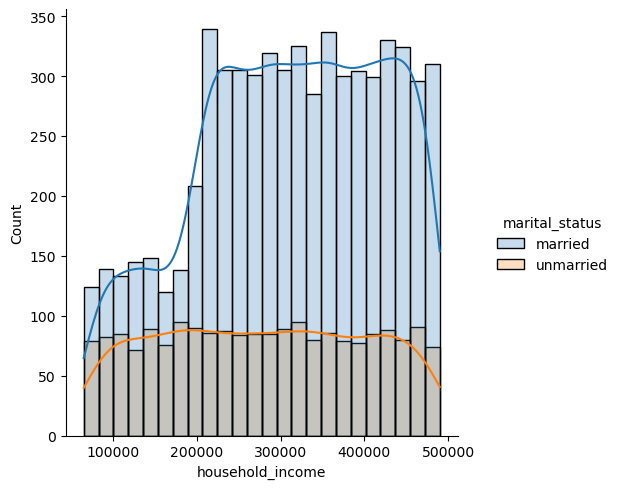

In [11]:
# Use `seaborn` to create a histogram for household income, 
# split by marital status. Set the transparency to 0.25 
# and add a kernel density estimation line.
# YOUR CODE HERE
sns.displot(data=cust, x='household_income', hue='marital_status', kind='hist', kde=True, alpha=0.25)

### Carefully explain the the histogram you created for household income in the Markdown cell below.

Immediately, the distribution between married and unmarried household income is apparent. Married people make significantly more in household_income than unmarried people. The married distribution increases over $200,000, indicating that the majority of the married people in this population make more than $200,000. Interestingly, the next highest bin is around $350,000 followed by approximately $450,000 for married people. The unmarried households appear to be roughly evenly spread from around $35,000 to $500,000. This may be a flatter distribution because of fewwer people than the married population and the insights are not as evident on this scale. 

<AxesSubplot:xlabel='spend', ylabel='marital_status'>

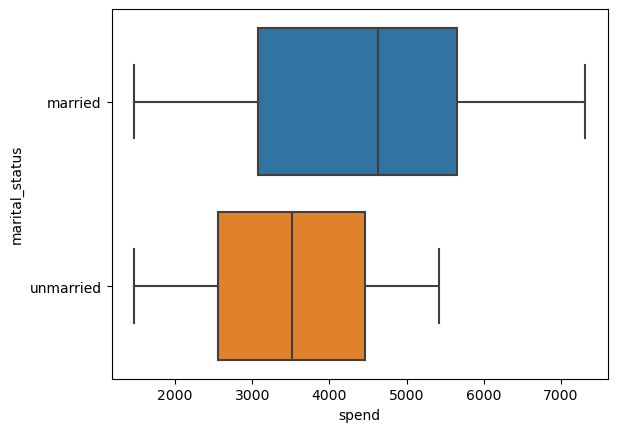

In [12]:
# Use `seaborn` to create a boxplot for spending broken out by gender.
# YOUR CODE HERE
sns.boxplot(data=cust, x='spend', y='marital_status')

### Carefully explain the the boxplot you created in the Markdown cell below.

The boxplot above shows the married population in blue and the unmarried population in orange. The median spending for married households is approximately $4,800 with the middle 50 percent of the population being between roughly $3,000 and almost $6,000. The whiskers for the married household on the lower end (left side of the graphic) are approximately the same as the unmarried household around less than $1,000. The upper whisker for the married household is above $7,000 while the upper whisker for the unmarried lower whisker is approximately $5,500. Notably the lower wisker and median for the unmarried household are both within the same spending range as the married middle 50%. Further, the median spending for the unmarried household is approximately $3,500 which is about $1,300 less than the married household. 

-----

# Problem 3: Relationship Analysis

Be sure to complete these steps in the order outlined below and in their appropriate code cells. There is file named `customers.csv` in the subfolder `data`. It contains information on customers of one of your clients.
1. Use `seaborn` to create a heatmap of the correlation matrix for all of the quantitative variables in the customer dataset. Be sure add labels to the squares and have the color range from -1 to +1.
2. Which variable has the strongest correlation to spending? Save the name of the column in a variable named `strongest_corr_to_spend`. Be sure to use the name **exactly** as found in the column names.
3. Create a sample of 100 rows from the `cust` `DataFrame` using a seed of 71. Store the results in a variable named `sample`. Using `sample`, create a scatter plot with `matplotlib` between the spending and the variable with the strongest correlation. Be sure to place the variables on the correct axes.

<AxesSubplot:>

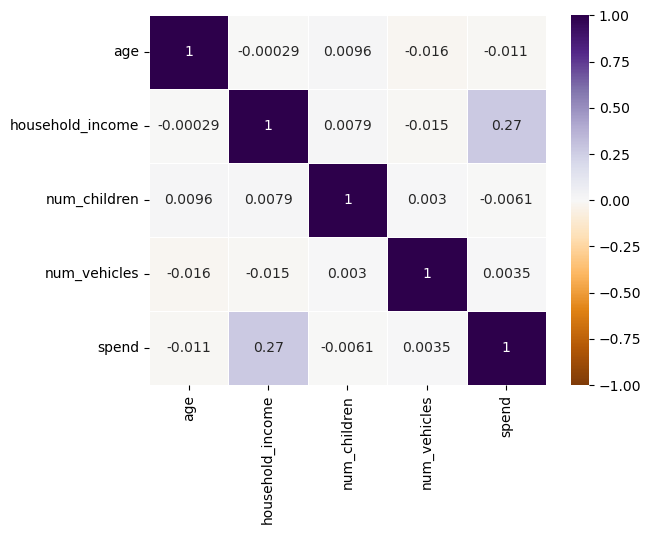

In [13]:
# Use `seaborn` to create a heatmap of the correlation matrix for 
# all of the quantitative variables in the customer dataset.
# Be sure add labels to the squares and have the color range
# from -1 to +1.
# YOUR CODE HERE

# .corr() for corelation matrix of cust, labels in squares with annot=True, vmin/max and pur/org color
sns.heatmap(cust.corr(), annot=True, linewidth=0.5, cmap='PuOr', vmin=-1.0, vmax=1.0)

In [14]:
# Which variable has the strongest correlation to spending? 
# Save the name of the column in a variable named `strongest_corr_to_spend`. 
# Be sure to use the name as **exactly** found in the column names.
# YOUR CODE HERE
# the largest correlation to spending is household_income
strongest_corr_to_spend = cust.household_income

<hr>

Text(0, 0.5, 'Spend ($)')

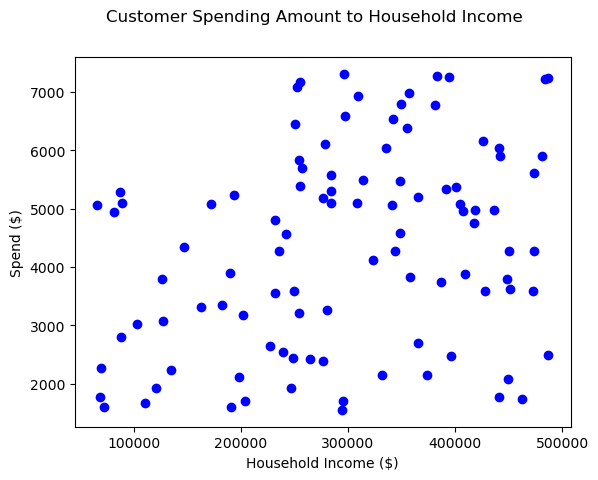

In [39]:
#  Create a sample of 100 rows from the `cust` `DataFrame` using a seed of 71. 
# Store the results in a variable named `sample`. Using `sample` create a 
# scatter plot between the spending and the variable with the strongest correlation.
# Be sure to place the variables on the correct axes.
# YOUR CODE HERE
# seed 71 with random_state
sample = cust.sample(100, random_state=71)
fig, ax = plt.subplots()

# ax.scatter(x-series, y-series)
ax.scatter(sample.household_income, sample.spend, c='b')

# add title
fig.suptitle('Customer Spending Amount to Household Income')

# add axis labels
ax.xaxis.set_label_text('Household Income ($)')
ax.yaxis.set_label_text('Spend ($)')

-----

# Problem 4

Be sure to complete these steps in the order outlined below and in their appropriate code cells. There is file named `customers.csv` in the subfolder `data`. It contains information on the customers of one of your clients.
1. Add a new column named `spend_category` the `cust` `DataFrame`. The column should contain the categories "low", "medium", and "high" for amount spent. Those three bins should be equal-width. (Sanity check: This means there will probably be a different number of observations in each bin.)
2. Find the average for all of the numerical columns of `cust` across your newly created column `spend_category`. Store the results in a `DataFrame` variable named `averages`.
3. Find the minimum, maximum, average, and count for the column `spend` across each `spend_category`. Store the results in a variable named `summary`.
4. Create a frequency table that has spending category on the rows and marital status in the columns. Be sure to add totals for both the rows and columns. Store your results in a variable named `freq_table`.
5. Create a frequency table that has spending category on the rows and marital status in the columns. This time make the values be the percentage/fraction. Be sure that each **row** adds to 100% (i.e., 1), including the total row. You should **not** have a column that is labeled "All". Store your results in a variable named `percent_table`.

In [16]:
# Add a new column named `spend_category` the `cust` `DataFrame`.
# The column should contain the categories "low", "medium", and
# "high" for amount spent.
# YOUR CODE HERE
spend_category, bin_ranges = pd.cut(cust.spend, bins=3,
                                   labels=['low', 'medium', 'high'],
                                   retbins=True)

In [17]:
# view spend_category
spend_category

0         high
1       medium
2         high
3          low
4          low
         ...  
8152      high
8153       low
8154    medium
8155      high
8156    medium
Name: spend, Length: 8157, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [18]:
# view num rows in each bucket
spend_category.value_counts()

medium    3421
low       2827
high      1909
Name: spend, dtype: int64

In [19]:
# add spend_category col to cust
cust['spend_category'] = spend_category

In [20]:
# confirm added
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8157 entries, 0 to 8156
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   cust_id             8157 non-null   object  
 1   join_date           8157 non-null   object  
 2   gender              8157 non-null   object  
 3   age                 8157 non-null   int64   
 4   marital_status      8157 non-null   object  
 5   household_income    8157 non-null   int64   
 6   home_ownership      8157 non-null   object  
 7   num_children        8157 non-null   int64   
 8   num_vehicles        8157 non-null   int64   
 9   last_purchase_date  8157 non-null   object  
 10  spend               8157 non-null   int64   
 11  spend_category      8157 non-null   category
dtypes: category(1), int64(5), object(6)
memory usage: 709.2+ KB


<hr>

In [21]:
# Find the average for all of the numerical columns of `cust` 
# across your newly created column `spend_category`. 
# Store the results in a variable named `averages`. 
# YOUR CODE HERE
averages = cust.groupby('spend_category').mean()

In [22]:
# view averages and type
averages.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 3 entries, low to high
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3 non-null      float64
 1   household_income  3 non-null      float64
 2   num_children      3 non-null      float64
 3   num_vehicles      3 non-null      float64
 4   spend             3 non-null      float64
dtypes: float64(5)
memory usage: 255.0 bytes


In [41]:
# view averages
averages

,age,household_income,num_children,num_vehicles,spend
spend_category,,,,,
low,38.008843,275349.043863,2.461620,2.483905,2451.078882
medium,38.082140,287373.866998,2.494592,2.526162,4484.845659
high,37.661603,364623.092719,2.417496,2.503929,6265.764798


In [42]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
assert_equal(averages.index.name, 'spend_category', msg='You did not create the `averages` DataFrame correctly')

<hr>

In [24]:
# Find the minimum, maximum, average, and count for the column `spend` 
#across each `spend_category`. Store the results in a variable named `summary`.
# YOUR CODE HERE
summary = cust.groupby('spend_category')['spend'].agg(['min', 'max', 'mean', 'count'])

In [25]:
# view summary
summary

,min,max,mean,count
spend_category,,,,
low,1467,3415,2451.078882,2827
medium,3417,5363,4484.845659,3421
high,5364,7312,6265.764798,1909


In [26]:
# This is a test cell
# If **NO** message is printed, it means that the tests passed
# One basic test to see if your code works
high_count = summary.loc['high']['count']
assert_equal(high_count, 1909, msg='You did not find the correct count for high spenders')

<hr>

In [27]:
# Create a frequency table that has spending category on the rows and
# marital status in the columns. Be sure to add totals for both the 
# rows and columns. Store your results in a variable named `freq_table`.
# YOUR CODE HERE
freq_table = pd.crosstab(index=cust.spend_category, columns=cust.marital_status,
           colnames=['marital_status'],margins=True)

In [28]:
# vieq freq_table to confirm
freq_table

marital_status,married,unmarried,All
spend_category,,,
low,1876,951,2827
medium,2374,1047,3421
high,1889,20,1909
All,6139,2018,8157


<hr>

In [29]:
# Create a frequency table that has spending category on the rows and 
# marital status in the columns. This time make the values be the 
# percentage/fraction. Be sure that each **row** adds to 100% (i.e., 1),
# including the total row. You should **not** have a column that is 
# labeled "All" Store your results in a variable named `percent_table`.
# YOUR CODE HERE
percent_table = pd.crosstab(index=cust.spend_category, columns=cust.marital_status,
           colnames=['marital_status'], normalize='index', margins=True)

In [30]:
# review percent_table to confirm all rows add to 1, total row only and not column
percent_table

marital_status,married,unmarried
spend_category,,
low,0.663601,0.336399
medium,0.693949,0.306051
high,0.989523,0.010477
All,0.752605,0.247395


<hr>

**&copy; 2022 - Present: Matthew D. Dean, Ph.D.   
Clinical Associate Professor of Business Analytics at William \& Mary.**